In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 6, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 0}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
# pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0)

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36812511 0.29366272] - dtheta : 0.10118852692377112
0 - [StepR, StepZ]: [-0.0236111  -0.02026723]
1 - RZ : [ 6.19199781 -4.49008579] - rhotheta : [ 3.80289834 -1.6292324 ]
1 - [DeltaR, DeltaZ] : [-0.161072  -0.1732541] - dtheta : 0.03779092306370524
1 - [StepR, StepZ]: [0.00559025 0.00256556]
2 - RZ : [ 6.19758806 -4.48752024] - rhotheta : [ 3.80001455 -1.62780323]
2 - [DeltaR, DeltaZ] : [-0.01704153 -0.02901229] - dtheta : 0.004010692884596656
2 - [StepR, StepZ]: [ 0.00597728 -0.00824633]
3 - RZ : [ 6.20356534 -4.49576657] - rhotheta : [ 3.80791237 -1.62611269]
3 - [DeltaR, DeltaZ] : [0.00039688 0.00018237] - dtheta : 0.00010142199555973619
3 - [StepR, StepZ]: [ 5.74398542e-05 -1.32091785e-04]
4 - RZ : [ 6.20362278 -4.49589866] - rhotheta

In [3]:
eps_s_1, eps_u_1 = manifold.find_homoclinic(2.179774577375764e-07, 3.84907705931755e-06, n_s = 7, n_u = 6)
bounds_1 = manifold.find_bounds(eps_s_1, eps_u_1)

2024-05-14 09:39:07 [debug    ] Guess - 2.179774577375764e-07, 3.84907705931755e-06
2024-05-14 09:39:07 [debug    ] Bounds - ((2.179774577375764e-07, 6.233146681885585e-06), (3.84907705931755e-06, 0.00011005856456520835))
2024-05-14 09:39:07 [debug    ] n_s, n_u - 7, 6
2024-05-14 09:39:07 [debug    ] Inside : (2.179774577375764e-07, 3.84907705931755e-06)
2024-05-14 09:39:08 [debug    ] Returns - (array([5.3107421 , 1.94017942]), array([5.44666578, 1.99703024]), array([-0.13592368, -0.05685082]))
2024-05-14 09:39:08 [debug    ] Inside : (2.1363184911376133e-05, 2.211511979003222e-06)
2024-05-14 09:39:09 [debug    ] Returns - (array([ 8.51305024, -2.01482931]), array([6.15427794, 2.14642123]), array([ 2.3587723 , -4.16125054]))
2024-05-14 09:39:09 [debug    ] Inside : (2.2211607804463148e-07, 3.909969242492378e-06)
2024-05-14 09:39:11 [debug    ] Returns - (array([5.33198406, 1.9497413 ]), array([5.42826123, 1.98992238]), array([-0.09627718, -0.04018108]))
2024-05-14 09:39:11 [debug    ]

In [6]:
bounds_i = np.array(bounds_1)
bounds_i[0][0] = manifold.clinics[-1][1]
bounds_i[1][1] = manifold.clinics[-1][2]
bounds_i = (tuple(bounds_i[0]), tuple(bounds_i[1]))

In [7]:
bounds_1

((2.3729106445740107e-07, 6.785423448463719e-06),
 (3.979088597693658e-06, 0.00011377578099806235))

In [8]:
bounds_i

((2.3729106445740107e-07, 6.785423448463719e-06),
 (3.979088597693658e-06, 3.979088597693658e-06))

In [9]:
# i = 1
fund = manifold.fundamental_segment
# guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 5/6), bounds_1[1][0]*np.power(manifold.lambda_u, 5/6)]
guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 1/2), bounds_1[1][0]*np.power(manifold.lambda_u, 1/2)]
print(f"initial guess: {guess_i}")

initial guess: [1.2689024081076188e-06, 2.1278075367975738e-05]


In [10]:
eps_s_i, eps_u_i = manifold.find_homoclinic(1.2560522331587575e-06, 2.388481018696467e-05, bounds = bounds_i, n_s=7, n_u=5, options={"factor": 0.1})

2024-05-14 09:40:42 [debug    ] Guess - 1.2560522331587575e-06, 2.388481018696467e-05
2024-05-14 09:40:42 [debug    ] Bounds - ((2.3729106445740107e-07, 6.785423448463719e-06), (3.979088597693658e-06, 3.979088597693658e-06))
2024-05-14 09:40:42 [debug    ] n_s, n_u - 7, 5
2024-05-14 09:40:42 [debug    ] Inside : (1.2560522331587575e-06, 2.388481018696467e-05)
2024-05-14 09:40:42 [debug    ] Returns - (array([7.63772338, 1.73005057]), array([7.50184942, 1.81526909]), array([ 0.13587396, -0.08521851]))
2024-05-14 09:40:42 [debug    ] Inside : (0.018803523474832492, 5.108792126004968e-05)
2024-05-14 09:40:43 [debug    ] Returns - (array([ 6.22336475, -4.47802911]), array([6.44896014, 2.14354193]), array([-0.22559539, -6.62157103]))
2024-05-14 09:40:43 [debug    ] Inside : (1.036871092244973e-06, 2.3732006590908526e-05)
2024-05-14 09:40:44 [debug    ] Returns - (array([7.38744998, 1.87809864]), array([7.51024702, 1.81034599]), array([-0.12279704,  0.06775265]))
2024-05-14 09:40:44 [debug  

In [11]:
manifold.clinics

[(3.979088597693658e-06,
  2.3729106445740107e-07,
  3.979088597693658e-06,
  array([5.40783636, 1.98182201]),
  array([5.40783636, 1.98182201])),
 (2.3795784088632125e-05,
  1.1346364802262744e-06,
  2.3795784088584443e-05,
  array([7.5067373 , 1.81240889]),
  array([7.50673729, 1.81240889]))]

In [13]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 10, 10
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

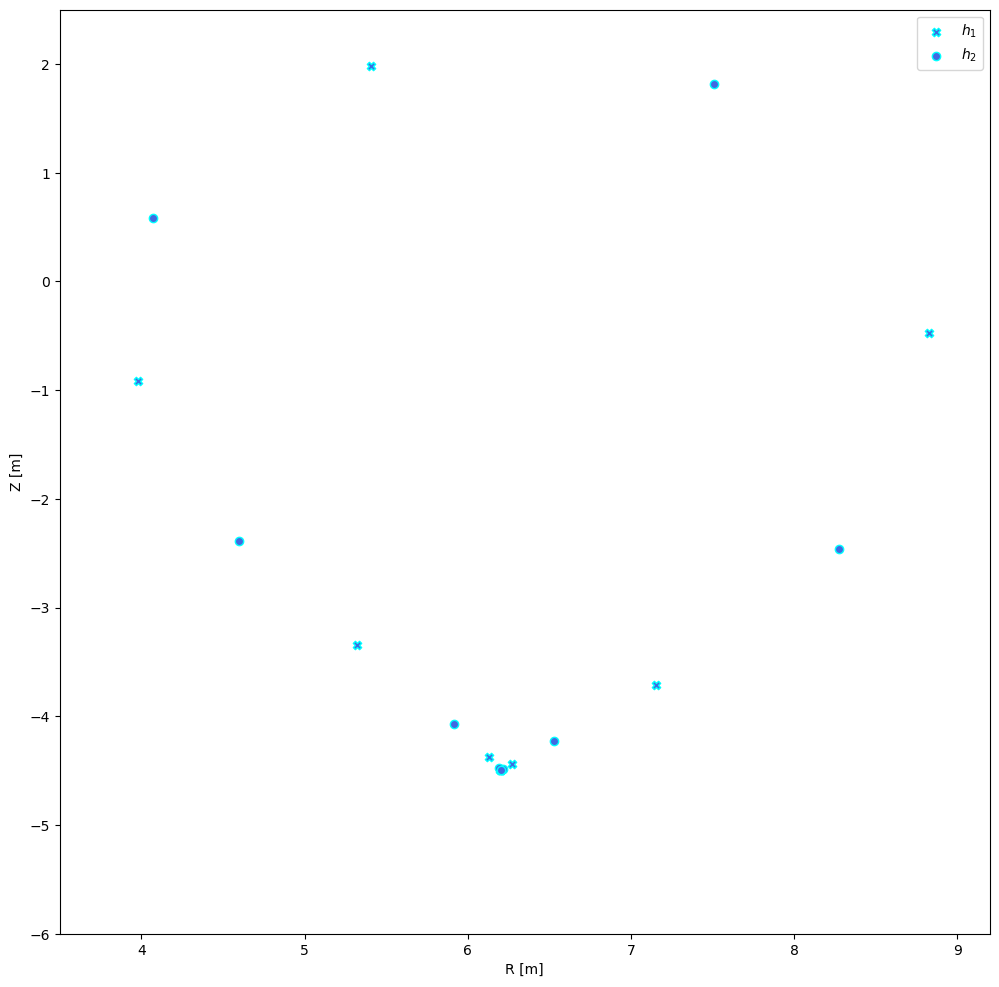

In [14]:
fig.set_size_inches(12, 12)
ax.set_xlim(3.5, 9.2)
ax.set_ylim(-6, 2.5)
ax.set_title('')
ax.set_xlabel(r'R [m]')
ax.set_ylabel(r'Z [m]')

ax.legend()


fig

In [15]:
eps_s, eps_u = manifold.fundamental_segment
eps_s, eps_u = eps_s[0], eps_u[0]

In [16]:
manifold.compute(eps_s=eps_s, eps_u=eps_u, neps=40)

2024-05-14 09:41:59 [info     ] Computing unstable manifold with postive epsilon...
2024-05-14 09:42:03 [info     ] Computing stable manifold with positive epsilon...


In [17]:
manifold.plot(ax=ax)

2024-05-14 09:42:22 [warning  ] Manifold u- not computed.
2024-05-14 09:42:22 [warning  ] Manifold s- not computed.


(<Figure size 1200x1200 with 1 Axes>, <Axes: xlabel='R [m]', ylabel='Z [m]'>)

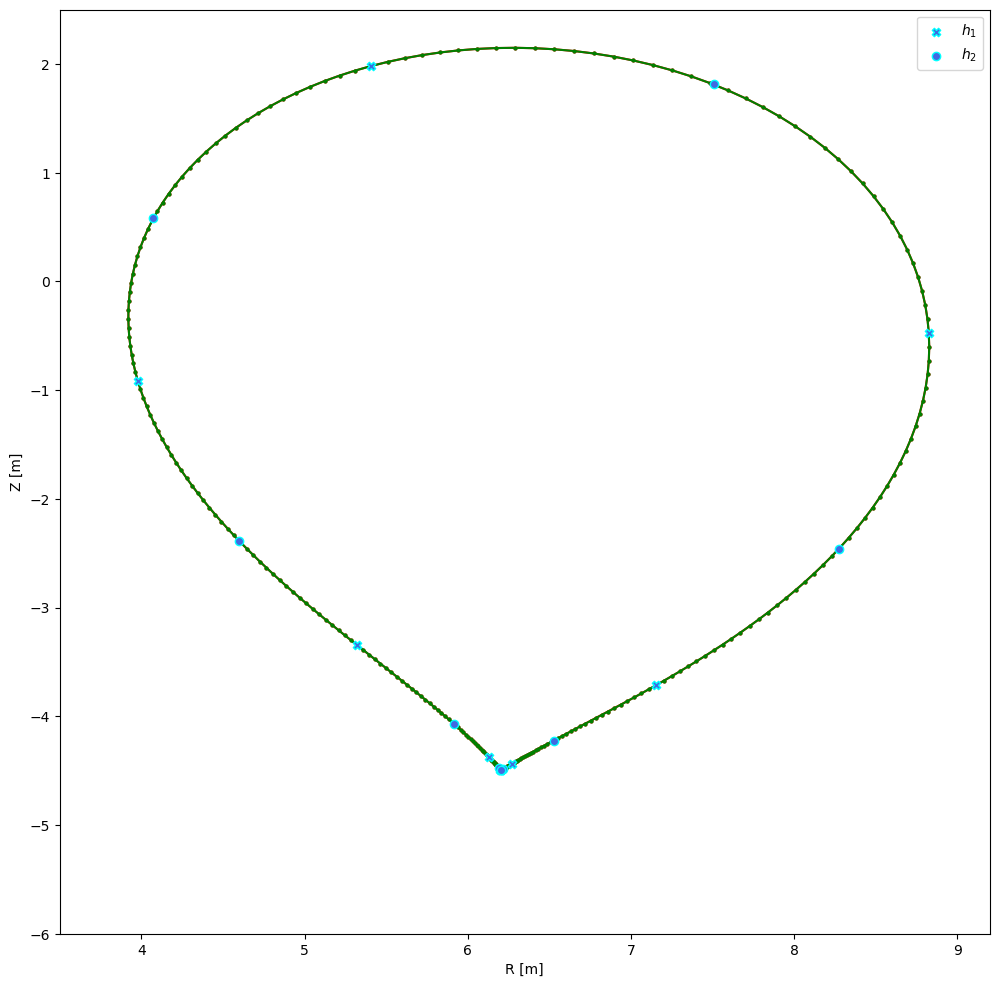

In [18]:
fig

In [19]:
manifold.resonance_area()

2024-05-14 09:42:46 [info     ] Forward integration goes beyond stable saddle point.
2024-05-14 09:42:46 [debug    ] rfp_s: [ 6.20362279 -4.49589868], rze_end: [ 6.20361998 -4.49590122], rze_forward: [ 6.20362258 -4.49589856]
2024-05-14 09:42:46 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-14 09:42:46 [debug    ] rfp_u: [ 6.20362279 -4.49589868], rze_end: [ 6.20362901 -4.49590952], rze_backward: [ 6.20362311 -4.49589896]
2024-05-14 09:42:46 [info     ] Potential integration completed for homo/hetero-clinic point of order : 3.979e-06
2024-05-14 09:42:46 [info     ] Forward integration goes beyond stable saddle point.
2024-05-14 09:42:46 [debug    ] rfp_s: [ 6.20362279 -4.49589868], rze_end: [ 6.20362155 -4.49589975], rze_forward: [ 6.20362219 -4.49589773]
2024-05-14 09:42:46 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-14 09:42:46 [debug    ] rfp_u: [ 6.20362279 -4.49589868], rze_end: [ 6.2036339  -4.49591808], rze_backward: 

(array([ 1.71754483e-05, -1.71754483e-05]),
 [[array([  0.43279954, -12.40643766, -10.09937638,   9.95937506,
           12.33143352,  12.42277032,  12.42597904]),
   array([ 11.54844147,  17.68618878,  13.00300369, -10.20905009,
          -12.3432692 , -12.42318869, -12.42599777])],
  [array([-14.99268205,   2.00466151, -18.57170803,   3.56384778,
           11.97945999,  12.41021658,  12.42553781]),
   array([  2.35394543,  27.70631808,  -2.2741666 , -11.93689039,
          -12.40873634, -12.42548505, -12.42608398])]],
 [[array([ 6.20362258, -4.49589856]), array([ 6.20362311, -4.49589896])],
  [array([ 6.20362219, -4.49589773]), array([ 6.2036232 , -4.49589933])]])

In [20]:
manifold.areas

array([ 1.71754483e-05, -1.71754483e-05])

In [21]:
manifold.areas.sum()

0.0